<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-for-Finance-(2nd-ed.)" data-toc-modified-id="Python-for-Finance-(2nd-ed.)-1">Python for Finance (2nd ed.)</a></span></li><li><span><a href="#Trading-Platform" data-toc-modified-id="Trading-Platform-2">Trading Platform</a></span><ul class="toc-item"><li><span><a href="#Risk-Disclaimer" data-toc-modified-id="Risk-Disclaimer-2.1">Risk Disclaimer</a></span></li><li><span><a href="#Author-Disclaimer" data-toc-modified-id="Author-Disclaimer-2.2">Author Disclaimer</a></span></li><li><span><a href="#Retrieving-Tick-Data" data-toc-modified-id="Retrieving-Tick-Data-2.3">Retrieving Tick Data</a></span></li><li><span><a href="#Retrieving-Candles-Data" data-toc-modified-id="Retrieving-Candles-Data-2.4">Retrieving Candles Data</a></span></li><li><span><a href="#Connecting-to-the-API" data-toc-modified-id="Connecting-to-the-API-2.5">Connecting to the API</a></span></li><li><span><a href="#Retrieving-Historical-Data" data-toc-modified-id="Retrieving-Historical-Data-2.6">Retrieving Historical Data</a></span></li><li><span><a href="#Streaming-Data" data-toc-modified-id="Streaming-Data-2.7">Streaming Data</a></span></li><li><span><a href="#Placing-Orders" data-toc-modified-id="Placing-Orders-2.8">Placing Orders</a></span></li><li><span><a href="#Account-Information" data-toc-modified-id="Account-Information-2.9">Account Information</a></span></li></ul></li></ul></div>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Trading Platform

## Risk Disclaimer

<font size="-1">
Trading forex/CFDs on margin carries a high level of risk and may not be suitable for all investors as you could sustain losses in excess of deposits. Leverage can work against you. Due to the certain restrictions imposed by the local law and regulation, German resident retail client(s) could sustain a total loss of deposited funds but are not subject to subsequent payment obligations beyond the deposited funds. Be aware and fully understand all risks associated with the market and trading. Prior to trading any products, carefully consider your financial situation and experience level. Any opinions, news, research, analyses, prices, or other information is provided as general market commentary, and does not constitute investment advice. FXCM & TPQ will not accept liability for any loss or damage, including without limitation to, any loss of profit, which may arise directly or indirectly from use of or reliance on such information.
</font>

## Author Disclaimer

The author is neither an employee, agent nor representative of FXCM and is therefore acting independently. The opinions given are their own, constitute general market commentary, and do not constitute the opinion or advice of FXCM or any form of personal or investment advice. FXCM assumes no responsibility for any loss or damage, including but not limited to, any loss or gain arising out of the direct or indirect use of this or any other content. Trading forex/CFDs on margin carries a high level of risk and may not be suitable for all investors as you could sustain losses in excess of deposits.

## Retrieving Tick Data

In [2]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

## 这节课需要使用FXCM的API，API（ Application Programming Interface）能够帮你实现轻松的和其他软件组件（如服务器，操作系统等）的交互。只要他们遵循了同一个协议，组件可以交换或者是改变。银行不需要知道时哪一个顾客或者说顾客是怎么进来的，顾客也不需要知道银行拿自己的钱去做什么了。只要负责的柜员在这里并做好工作，整个流程将会继续工作。API 应用范围很广：从操作系统中简单的 fork() 到我们接触的百度地图API，和风天气API，又或者是邢远分享的段子，这些 API 都大大简化了程序员的工作。
## 协议是规定了各部分之间如何进行交流的一系列规则的集合。各部分之间想要完成交互必须理解并且遵守同一个协议。同时交互的双方使用同一的格式(Format)。
## API 端点 通常是指在同一个接口中提供特定功能子集的服务提供者。小冰和小娜两个柜员A和B负责不同的业务，A和B就是是同一个柜台不同功能的提供者，A和B都是端点。不同的端点可以有不同的协议和不同的格式。
## 就像取钱，取出之前会核对是否有足够的余额，API 能确认所有的操作都是合法的。不行会通知余额不足，在发生错误的时候 API 会根据错误报告机制发出指示，减轻开发人员的负担。
## 打单子对余额的时候往往会出现一张单子报不完，每次查看十个账户，看完了之后再来十个。这叫做分页（pagination），可以节省带宽和服务器资源，因为你不需要一次获取数据集中的所有内容。
## 只想要知道他某一个账户中的余额的话，API端口可以过滤（filtering），它还有助于节省带宽和资源，并且更易于导航。
## 想从A端口取出超额的钱，所以通过身份伪装成B，来给A传递假消息，但是会被A识破。因为API中内置授权和访问控制，以确保只有授权人员才能访问特定数据。
## 用户报复性使用，类似于在柜台取0.01元来影响银行的运转。可以实施速率限制来控制服务器资源的使用，以确保用户不会滥用服务。
## API 通常都会被设计具有这些功能，它可以充当防火墙，在保护资源免受滥用的同时允许合法请求通过。
## 综上API就是服务型的通讯方法，用户通过API(可以是packages)来高效获取信息，同时API也保障被访问信息源的稳定运行(银行)。

In [3]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [4]:
from fxcmpy import fxcmpy_tick_data_reader as tdr

In [5]:
import fxcmpy

## [访问API：fxcmpy](https://www.fxcm.com/fxcmpy/)

## [获得API码](https://tradingstation.fxcm.com/)

## 想要获得授权，有两种方式，一种是每次，都写一下API_TOKEN的函数语句；一种是做一个.cfg的文件在ipynb同一个文件夹下面。

## fxcmpy在国内用不了。

In [6]:
cc = '30a50259b222786337b7159ceb93e6a9c3a40f83'
con = fxcmpy.fxcmpy(access_token=cc, log_level='error', server='demo', log_file='log.txt')

In [7]:
con = fxcmpy.fxcmpy(config_file= 'fxcm.cfg')

ServerError: Can not connect to FXCM Server.

In [8]:
print(tdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [9]:
start = dt.datetime(2018, 6, 25)  
stop = dt.datetime(2018, 6, 30)  

In [10]:
td = tdr('EURUSD', start, stop)  

In [11]:
td.get_raw_data().info()  

<class 'pandas.core.frame.DataFrame'>
Index: 1963779 entries, 06/24/2018 21:00:12.290 to 06/29/2018 20:59:00.607
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Bid     float64
 1   Ask     float64
dtypes: float64(2)
memory usage: 44.9+ MB


In [12]:
td.get_data().info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1963779 entries, 2018-06-24 21:00:12.290000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Bid     float64
 1   Ask     float64
dtypes: float64(2)
memory usage: 44.9 MB


In [13]:
td.get_data().head()

,Bid,Ask
2018-06-24 21:00:12.290,1.1662,1.16660
2018-06-24 21:00:16.046,1.1662,1.16650
2018-06-24 21:00:22.846,1.1662,1.16658
2018-06-24 21:00:22.907,1.1662,1.16660
2018-06-24 21:00:23.441,1.1662,1.16663


In [14]:
sub = td.get_data(start='2018-06-29 12:00:00',
                  end='2018-06-29 12:15:00')  

In [15]:
sub.head()

,Bid,Ask
2018-06-29 12:00:00.011,1.16497,1.16498
2018-06-29 12:00:00.071,1.16497,1.16497
2018-06-29 12:00:00.079,1.16497,1.16498
2018-06-29 12:00:00.091,1.16495,1.16498
2018-06-29 12:00:00.205,1.16496,1.16498


In [16]:
sub['Mid'] = sub.mean(axis=1)  

In [17]:
sub['SMA'] = sub['Mid'].rolling(1000).mean()  

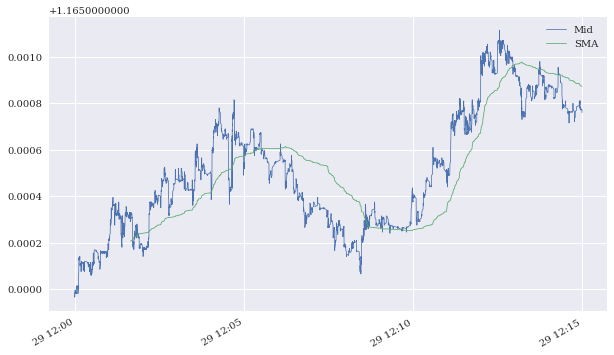

In [18]:
sub[['Mid', 'SMA']].plot(figsize=(10, 6), lw=0.75);
# plt.savefig('../../images/ch14/fxcm_plot_01.png')

## Retrieving Candles Data

In [19]:
from fxcmpy import fxcmpy_candles_data_reader as cdr

In [20]:
print(cdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [21]:
start = dt.datetime(2018, 5, 1)
stop = dt.datetime(2018, 6, 30)

`period` must be one of `m1`, `H1` or `D1`

In [22]:
period = 'H1'  

In [23]:
candles = cdr('EURUSD', start, stop, period)

In [24]:
data = candles.get_data()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1080 entries, 2018-04-29 21:00:00 to 2018-06-29 20:00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BidOpen   1080 non-null   float64
 1   BidHigh   1080 non-null   float64
 2   BidLow    1080 non-null   float64
 3   BidClose  1080 non-null   float64
 4   AskOpen   1080 non-null   float64
 5   AskHigh   1080 non-null   float64
 6   AskLow    1080 non-null   float64
 7   AskClose  1080 non-null   float64
dtypes: float64(8)
memory usage: 75.9 KB


In [26]:
data[data.columns[:4]].tail()  

,BidOpen,BidHigh,BidLow,BidClose
2018-06-29 16:00:00,1.16768,1.16820,1.16731,1.16769
2018-06-29 17:00:00,1.16769,1.16826,1.16709,1.16781
2018-06-29 18:00:00,1.16781,1.16816,1.16668,1.16684
2018-06-29 19:00:00,1.16684,1.16792,1.16638,1.16774
2018-06-29 20:00:00,1.16774,1.16904,1.16758,1.16816


In [27]:
data[data.columns[4:]].tail()  

,AskOpen,AskHigh,AskLow,AskClose
2018-06-29 16:00:00,1.16769,1.16820,1.16732,1.16771
2018-06-29 17:00:00,1.16771,1.16827,1.16711,1.16782
2018-06-29 18:00:00,1.16782,1.16817,1.16669,1.16686
2018-06-29 19:00:00,1.16686,1.16794,1.16640,1.16775
2018-06-29 20:00:00,1.16775,1.16907,1.16760,1.16861


In [28]:
data['MidClose'] = data[['BidClose', 'AskClose']].mean(axis=1)  

In [29]:
data['SMA1'] = data['MidClose'].rolling(30).mean()  
data['SMA2'] = data['MidClose'].rolling(100).mean()  

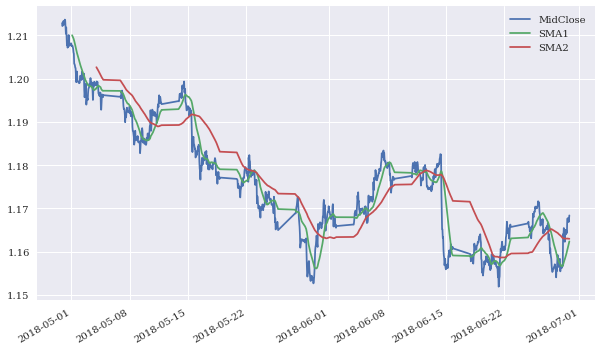

In [30]:
data[['MidClose', 'SMA1', 'SMA2']].plot(figsize=(10, 6));
# plt.savefig('../../images/ch14/fxcm_plot_02.png')

## Connecting to the API

In [31]:
import fxcmpy

In [32]:
fxcmpy.__version__

'1.2.9'

In [33]:
api = fxcmpy.fxcmpy(config_file='../../cfg/fxcm.cfg')  

OSError: Can not open config file: ../../cfg/fxcm.cfg

In [34]:
instruments = api.get_instruments()

NameError: name 'api' is not defined

In [35]:
print(instruments)

NameError: name 'instruments' is not defined

## Retrieving Historical Data

In [45]:
candles = api.get_candles('USD/JPY', period='D1', number=10)  

NameError: name 'api' is not defined

In [37]:
candles[candles.columns[:4]]  

AttributeError: 'fxcmpy_candles_data_reader' object has no attribute 'columns'

In [38]:
candles[candles.columns[4:]]  

AttributeError: 'fxcmpy_candles_data_reader' object has no attribute 'columns'

In [39]:
start = dt.datetime(2017, 1, 1)  
end = dt.datetime(2018, 1, 1)  

In [40]:
candles = api.get_candles('EUR/GBP', period='D1',
                          start=start, stop=end)  

NameError: name 'api' is not defined

In [37]:
candles.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309 entries, 2017-01-03 22:00:00 to 2018-01-01 22:00:00
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bidopen   309 non-null    float64
 1   bidclose  309 non-null    float64
 2   bidhigh   309 non-null    float64
 3   bidlow    309 non-null    float64
 4   askopen   309 non-null    float64
 5   askclose  309 non-null    float64
 6   askhigh   309 non-null    float64
 7   asklow    309 non-null    float64
 8   tickqty   309 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 24.1 KB


The parameter `period` must be one of `m1, m5, m15, m30, H1, H2, H3, H4, H6, H8, D1, W1` or `M1`.

In [38]:
candles = api.get_candles('EUR/USD', period='m1', number=250)  

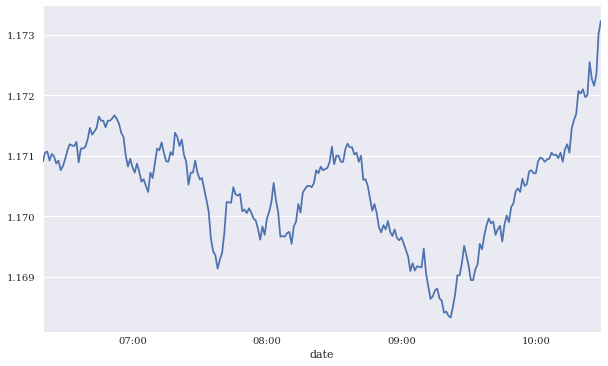

In [39]:
candles['askclose'].plot(figsize=(10, 6))
# plt.savefig('../../images/ch14/fxcm_plot_03.png');

## Streaming Data

In [41]:
def output(data, dataframe):
    print('%3d | %s | %s | %6.5f, %6.5f' 
          % (len(dataframe), data['Symbol'],
             pd.to_datetime(int(data['Updated']), unit='ms'), 
             data['Rates'][0], data['Rates'][1]))  

In [42]:
api.subscribe_market_data('EUR/USD', (output,))  

NameError: name 'api' is not defined

In [43]:
api.get_last_price('EUR/USD')  

NameError: name 'api' is not defined

In [44]:
api.unsubscribe_market_data('EUR/USD')  

NameError: name 'api' is not defined

## Placing Orders

In [44]:
api.get_open_positions()  

""


In [45]:
order = api.create_market_buy_order('EUR/USD', 100)  

In [46]:
sel = ['tradeId', 'amountK', 'currency',
       'grossPL', 'isBuy']  

In [47]:
api.get_open_positions()[sel]  

,tradeId,amountK,currency,grossPL,isBuy
0,168818203,100,EUR/USD,-11.08222,True


In [48]:
order = api.create_market_buy_order('EUR/GBP', 50)  

In [49]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,168818203,100,EUR/USD,-19.60868,True
1,168818204,50,EUR/GBP,-12.06709,True


In [50]:
order = api.create_market_sell_order('EUR/USD', 25)  

In [51]:
order = api.create_market_buy_order('EUR/GBP', 50)  

In [52]:
api.get_open_positions()[sel]  

,tradeId,amountK,currency,grossPL,isBuy
0,168818203,100,EUR/USD,-11.93480,True
1,168818204,50,EUR/GBP,-17.00531,True
2,168818206,25,EUR/USD,-4.47509,False
3,168818208,50,EUR/GBP,-19.74810,True


In [53]:
api.close_all_for_symbol('EUR/GBP')  

In [54]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,168818203,100,EUR/USD,-14.49263,True
1,168818206,25,EUR/USD,-4.04896,False


In [55]:
api.close_all()  

In [56]:
api.get_open_positions()

""


## Account Information

In [46]:
api.get_default_account()  

NameError: name 'api' is not defined

In [58]:
api.get_accounts().T  

,0
t,6
ratePrecision,0
accountId,1233279
balance,49665.4
usdMr,0
mc,N
mcDate,
accountName,01233279
usdMr3,0
hedging,Y


<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>